<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/PVT/PVTreports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PVT simulation
This chapter reviews the standard experiments performed by pressure/volume/temperature (PVT) laboratories on reservoir fluid samples: compositional analysis, multistage surface separation, constant composition expansion (CCE), differential liberation expansion (DLE), and constant volume depletion (CVD).

In [1]:
%%capture
!pip install git+https://github.com/equinor/neqsim-python.git
import neqsim
from neqsim import jNeqSim
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Litterature
1. [Whitson and Brule](http://www.ipt.ntnu.no/~curtis/courses/PhD-PVT/PVT-HOT-Vienna-May-2016x/e-notes/PVT-Papers/SPEPBM-Ch6.pdf)
2. https://www.slb.com/-/media/files/oilfield-review/1-pvt
3. http://www.ipt.ntnu.no/~curtis/courses/PVT-Flow/2018-TPG4145/e-notes/PVT-Papers/SPEPBM-Ch6.pdf
4. https://petrowiki.org/Calculating_PVT_properties



# Differential libreration simulations

In [2]:
tempSystem = jNeqSim.thermo.system.SystemSrkEos(273.15 + 97.5, 350.0);
tempSystem.addComponent("nitrogen", 0.39);
tempSystem.addComponent("CO2", 0.3);
tempSystem.addComponent("methane", 40.2);
tempSystem.addComponent("ethane", 7.61);
tempSystem.addComponent("propane", 7.95);
tempSystem.addComponent("i-butane", 1.19);
tempSystem.addComponent("n-butane", 4.08);
tempSystem.addComponent("i-pentane", 1.39);
tempSystem.addComponent("n-pentane", 2.15);
tempSystem.addComponent("n-hexane", 2.79);
tempSystem.addTBPfraction("C7", 4.28, 95 / 1000.0, 0.729);
tempSystem.addTBPfraction("C8", 4.31, 106 / 1000.0, 0.749);
tempSystem.addTBPfraction("C9", 3.08, 121 / 1000.0, 0.77);
tempSystem.addTBPfraction("C10", 2.47, 135 / 1000.0, 0.786);
tempSystem.addTBPfraction("C11", 1.91, 148 / 1000.0, 0.792);
tempSystem.addTBPfraction("C12", 1.69, 161 / 1000.0, 0.804);
tempSystem.addTBPfraction("C13", 1.59, 175 / 1000.0, 0.819);
tempSystem.addTBPfraction("C14", 1.22, 196 / 1000.0, 0.833);
tempSystem.addTBPfraction("C15", 1.25, 206 / 1000.0, 0.836);
tempSystem.addTBPfraction("C16", 1.0, 225 / 1000.0, 0.843);
tempSystem.addTBPfraction("C17", 0.99, 236 / 1000.0, 0.840);
tempSystem.addTBPfraction("C18", 0.92, 245 / 1000.0, 0.846);
tempSystem.addTBPfraction("C19", 0.6, 265 / 1000.0, 0.857);
tempSystem.addPlusFraction("C20", 6.64, 453 / 1000.0, 0.918);
tempSystem.getCharacterization().getLumpingModel().setNumberOfPseudoComponents(12);
tempSystem.getCharacterization().characterisePlusFraction();
tempSystem.setMixingRule("classic");

from neqsim.thermo import *
TPflash(tempSystem)
printFrame(tempSystem)

| 0                    | 1          | 2           | 3   | 4   | 5   | 6               |
|:---------------------|:-----------|:------------|:----|:----|:----|:----------------|
|                      | total      | OIL         |     |     |     |                 |
| nitrogen             | 3.9E-3     | 3.9E-3      |     |     |     | [mole fraction] |
| CO2                  | 3E-3       | 3E-3        |     |     |     | [mole fraction] |
| methane              | 4.02E-1    | 4.02E-1     |     |     |     | [mole fraction] |
| ethane               | 7.61E-2    | 7.61E-2     |     |     |     | [mole fraction] |
| propane              | 7.95E-2    | 7.95E-2     |     |     |     | [mole fraction] |
| i-butane             | 1.19E-2    | 1.19E-2     |     |     |     | [mole fraction] |
| n-butane             | 4.08E-2    | 4.08E-2     |     |     |     | [mole fraction] |
| i-pentane            | 1.39E-2    | 1.39E-2     |     |     |     | [mole fraction] |
| n-pentane            | 2.15E-2

In [3]:
satPresSim = jNeqSim.PVTsimulation.simulation.SaturationPressure(tempSystem);
#satPresSim.setTemperature(97.5, "C");
satPresSim.run();

print('saturation pressure ', satPresSim.getThermoSystem().getPressure(), ' bara')

pressures = [351.4, 323.2, 301.5, 275.9, 250.1, 226.1, 205.9, 179.1, 154.6, 132.1, 109.0, 78.6, 53.6, 22.0]
differentialLiberation = jNeqSim.PVTsimulation.simulation.DifferentialLiberation(tempSystem);
differentialLiberation.setPressures(pressures);
#differentialLiberation.setTemperature(97.5, "C");
differentialLiberation.runCalc();

saturation pressure  190.69891548156738  bara


Text(0, 0.5, 'Oil density [kg/m3]')

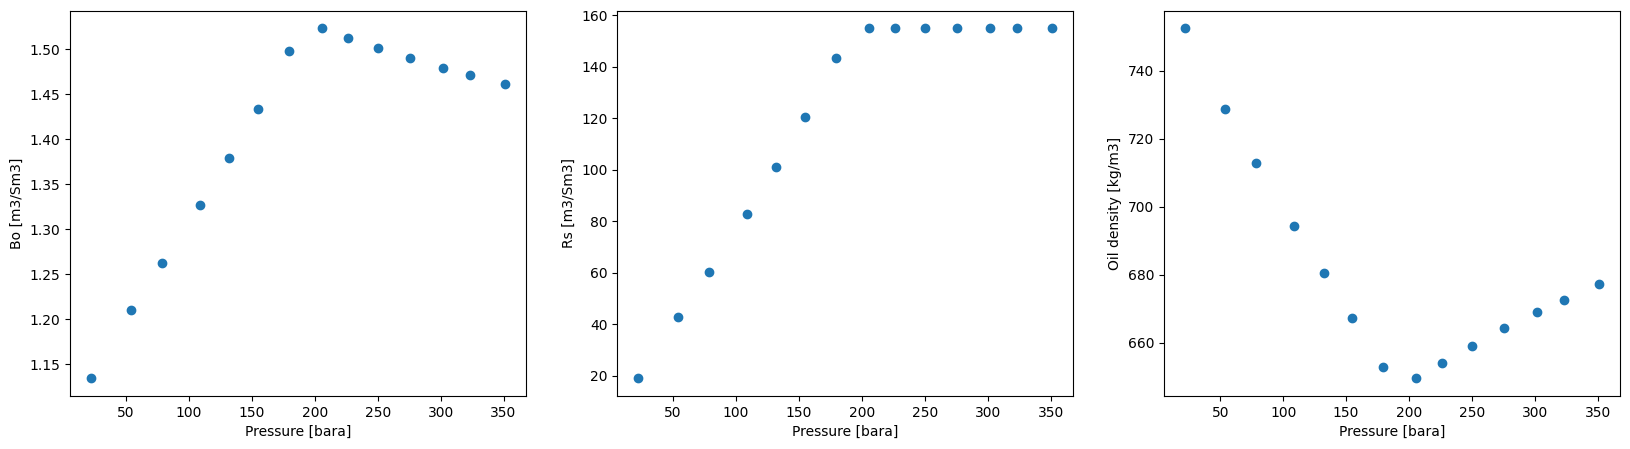

In [4]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressures, differentialLiberation.getBo(), "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Bo [m3/Sm3]')
plt.subplot(132)
plt.plot(pressures, differentialLiberation.getRs(), "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Rs [m3/Sm3]')
plt.subplot(133)
plt.plot(pressures, differentialLiberation.getOilDensity(), "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Oil density [kg/m3]')

# Constant mass experiemnts

In [5]:
tempSystem = jNeqSim.thermo.system.SystemSrkEos(273.15 + 97.5, 350.0);
tempSystem.addComponent("nitrogen", 0.39);
tempSystem.addComponent("CO2", 0.3);
tempSystem.addComponent("methane", 40.2);
tempSystem.addComponent("ethane", 7.61);
tempSystem.addComponent("propane", 7.95);
tempSystem.addComponent("i-butane", 1.19);
tempSystem.addComponent("n-butane", 4.08);
tempSystem.addComponent("i-pentane", 1.39);
tempSystem.addComponent("n-pentane", 2.15);
tempSystem.addComponent("n-hexane", 2.79);
tempSystem.addTBPfraction("C7", 4.28, 95 / 1000.0, 0.729);
tempSystem.addTBPfraction("C8", 4.31, 106 / 1000.0, 0.749);
tempSystem.addTBPfraction("C9", 3.08, 121 / 1000.0, 0.77);
tempSystem.addTBPfraction("C10", 2.47, 135 / 1000.0, 0.786);
tempSystem.addTBPfraction("C11", 1.91, 148 / 1000.0, 0.792);
tempSystem.addTBPfraction("C12", 1.69, 161 / 1000.0, 0.804);
tempSystem.addTBPfraction("C13", 1.59, 175 / 1000.0, 0.819);
tempSystem.addTBPfraction("C14", 1.22, 196 / 1000.0, 0.833);
tempSystem.addTBPfraction("C15", 1.25, 206 / 1000.0, 0.836);
tempSystem.addTBPfraction("C16", 1.0, 225 / 1000.0, 0.843);
tempSystem.addTBPfraction("C17", 0.99, 236 / 1000.0, 0.840);
tempSystem.addTBPfraction("C18", 0.92, 245 / 1000.0, 0.846);
tempSystem.addTBPfraction("C19", 0.6, 265 / 1000.0, 0.857);
tempSystem.addPlusFraction("C20", 6.64, 453 / 1000.0, 0.918);
tempSystem.getCharacterization().getLumpingModel().setNumberOfPseudoComponents(12);
tempSystem.getCharacterization().characterisePlusFraction();
tempSystem.setMixingRule("classic");

satPresSim = jNeqSim.PVTsimulation.simulation.SaturationPressure(tempSystem);
#satPresSim.setTemperature(97.5, "C");
satPresSim.run();

print('saturation pressure ', satPresSim.getThermoSystem().getPressure(), ' bara')

pressures = [351.4, 323.2, 301.5, 275.9, 250.1, 226.1, 205.9, 197.3, 189.3, 183.3, 165.0, 131.2, 108.3, 85.3, 55.6]
CMEexperiment = jNeqSim.PVTsimulation.simulation.ConstantMassExpansion(tempSystem);
CMEexperiment.setPressures(pressures);
#differentialLiberation.setTemperature(97.5, "C");
CMEexperiment.runCalc();

saturation pressure  190.69891548156738  bara


Text(0, 0.5, 'Y-factor [-]')

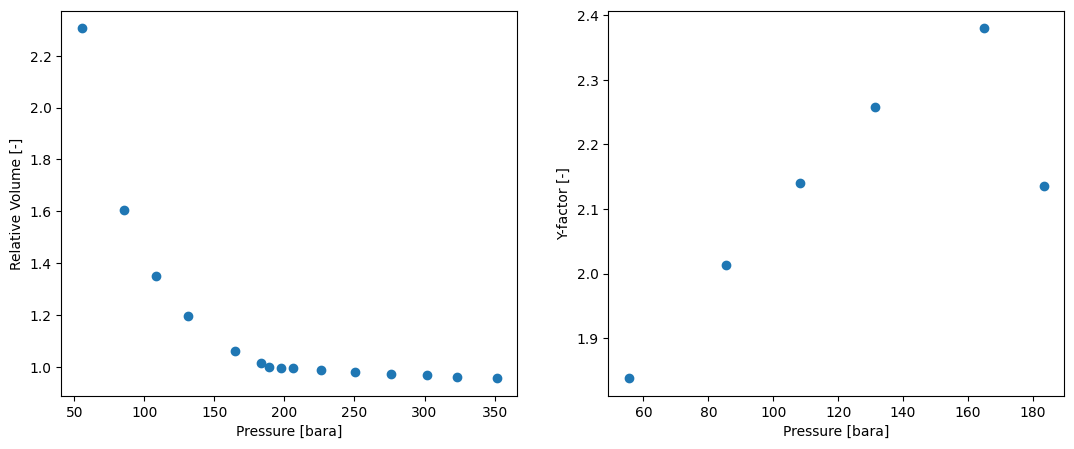

In [6]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressures, CMEexperiment.getRelativeVolume(), "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Relative Volume [-]')
plt.subplot(132)
plt.plot(pressures, CMEexperiment.getYfactor(), "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Y-factor [-]')

# Constant Volume Depletion

In [34]:
tempSystem = jNeqSim.thermo.system.SystemSrkEos(273.15 + 97.5, 350.0);
tempSystem.addComponent("nitrogen", 0.34);
tempSystem.addComponent("CO2", 3.59);
tempSystem.addComponent("methane", 67.42);
tempSystem.addComponent("ethane", 9.02);
tempSystem.addComponent("propane", 4.31);
tempSystem.addComponent("i-butane", 0.93);
tempSystem.addComponent("n-butane", 1.71);
tempSystem.addComponent("i-pentane", 0.74);
tempSystem.addComponent("n-pentane", 0.85);
tempSystem.addComponent("n-hexane", 1.38);
tempSystem.addTBPfraction("C7", 1.5, 109.00 / 1000.0, 0.6912);
tempSystem.addTBPfraction("C8", 1.69, 120.20 / 1000.0, 0.7255);
tempSystem.addTBPfraction("C9", 1.14, 129.5 / 1000.0, 0.7454);
tempSystem.addTBPfraction("C10", 0.8, 135.3 / 1000.0, 0.7864);
tempSystem.addPlusFraction("C11", 4.58, 256.2 / 1000.0, 0.8398);
# tempSystem.getCharacterization().characterisePlusFraction();
tempSystem.setMixingRule(2);

satPresSim = jNeqSim.PVTsimulation.simulation.SaturationPressure(tempSystem);
satPresSim.setTemperature(97.5, "C");
satPresSim.run();

print('saturation pressure ', satPresSim.getThermoSystem().getPressure(), ' bara')

pressures = [450.0, 400, 350, 300.0, 200.0, 150.0, 100.0, 50.0]
CVDsim = jNeqSim.PVTsimulation.simulation.ConstantVolumeDepletion(tempSystem);
CVDsim.setPressures(pressures);
CVDsim.setTemperature(97.5, "C");
CVDsim.runCalc();

saturation pressure  328.891845703125  bara


Text(0, 0.5, 'Cummulative Depleted [%]')

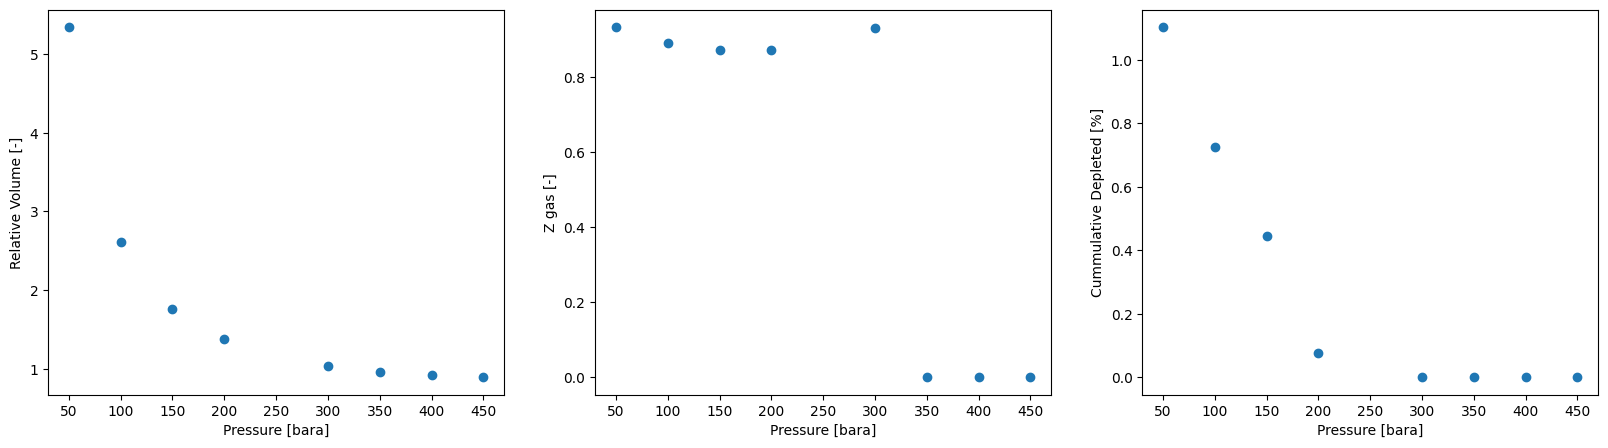

In [35]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressures, CVDsim.getRelativeVolume(), "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Relative Volume [-]')

plt.subplot(132)
plt.plot(pressures, CVDsim.getZgas(), "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Z gas [-]')

plt.subplot(133)
plt.plot(pressures, CVDsim.getCummulativeMolePercDepleted(), "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Cummulative Depleted [%]')

